# <font color='Blue'>Time Series.</font>

- A time series model is a statistical model used to analyze and predict data points that are collected or indexed in time order. 

- The primary purpose of time series models is to understand the underlying patterns in the data over time and use this understanding to forecast future values.

# <font color='Blue'> </font>

Key components of time series data include:

- **Trend**: The long-term movement or direction of the data, which may be upward, downward, or flat.

- **Seasonality**: Regular, repeating patterns or fluctuations that occur at fixed periods, such as yearly, monthly, or weekly cycles.

- **Noise**: Random variability or errors that cannot be explained by the model.

- **Cyclic patterns**: These are longer-term fluctuations that are not fixed in length, often influenced by economic or other external factors.

# <font color='Blue'> </font>

#### <font color='magenta'>Decomposition Models</font>

- Where we have a small data sets to check trend, seasonality, noise using mathematical formulas we can use this Decomposition models

**The Models are :-**

 1.Linear Model
 
 2.Exponential
 
 3.Quadratic
 
 4.Additive Seasonality
 
 5.Additive Seasonality with Quadratic Trend
 
 6.Multiplicative Season
 
 7.Multiplicative Additive Seasonality

These models are often used in time series analysis to capture both trends (long-term directions in data) and seasonality (recurring patterns), along with random noise or other unexplained variations.

# <font color='Blue'> </font>

#### <font color='magenta'>Linear Model</font>

- To check realtionship b/w Independent variable (Time Index) and Dependent variable(Sales, Tempature) is assumed to be Linear.

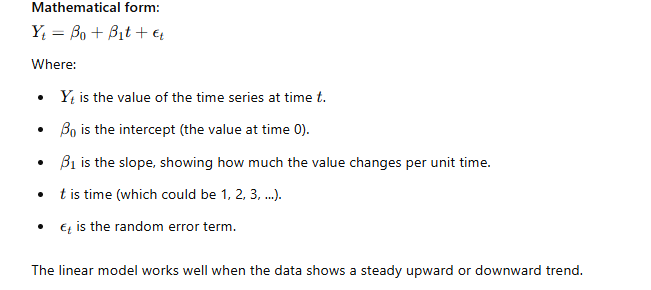

# <font color='Blue'> </font>

#### <font color='magenta'>Exponential </font>

- To check the Growth or Loss

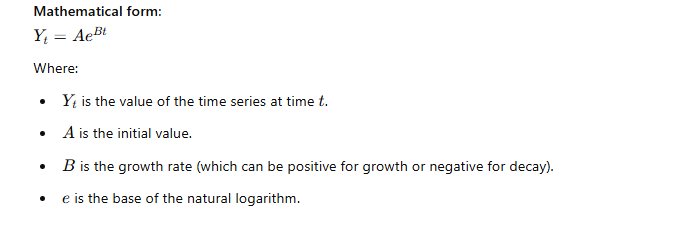

#### <font color='magenta'> </font>

#### <font color='magenta'>Quadratic </font>

- To check the Non-Linear trends or patterns in the deata.

- The model can be useful when there is a parabolioc or Unshaped relationship in the data over time.

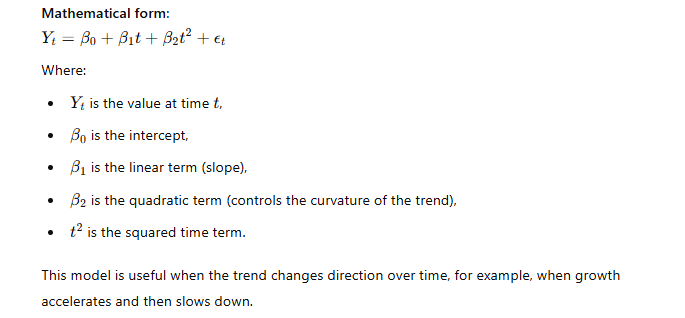

**Key Points**

- The Quadratic term(t) allows the model to capture currved relationships, such as when the data acceleretes or Deacceleretes over time (Either Upward or Downward)

If **B2 > 0** the model represent U-Shape Curve (Convex)

If **B2 > 0** the model represent Inverted U-Shaped (Concave) 

If **B2 > 0** the model represent redus to a Linear trend 

- This can be suiatable for cases where you have a curved trend.

#### <font color='magenta'> </font>

#### <font color='magenta'>Additive Seasonality </font>

- To check the seasonal pattern (ex:- growing sales on december ) is stable accross year

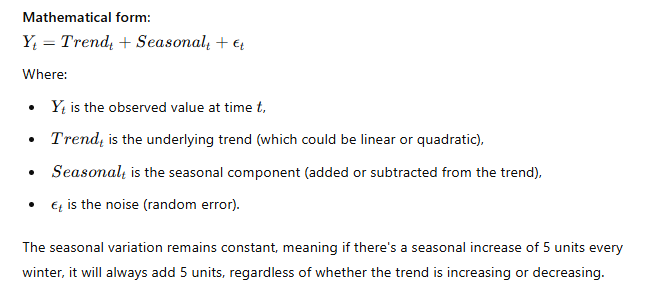

#### <font color='magenta'>  </font>

#### <font color='magenta'>Additive Seasonality with Quadratic Trend  </font>

- Same to check Seasonal pattern is stable across years but to check this they use Quadratic trend U-Shape.

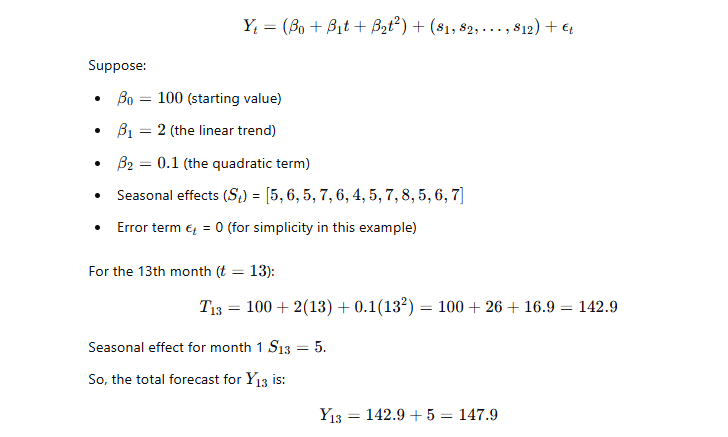

#### <font color='magenta'>  </font>

#### <font color='magenta'>Multiplicative Season  </font>

- To check the Seasonality where the trend was incressed The seasonality also incresses.

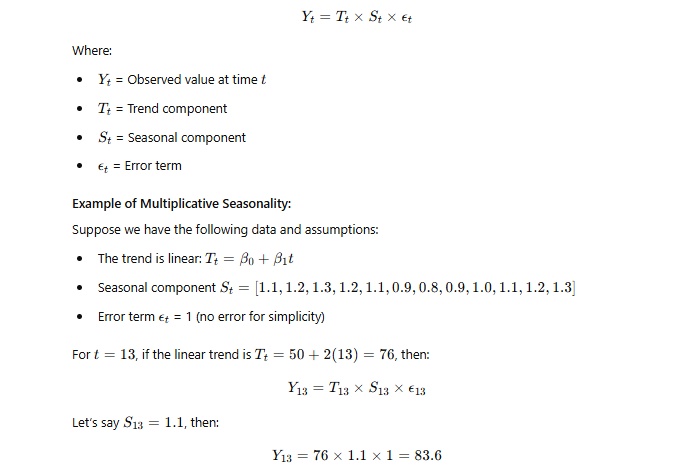

#### <font color='magenta'>  </font>

#### <font color='magenta'>Multiplicative additive seasonality   </font>

- A Multiplicative Additive Seasonality model is a combination of both additive and multiplicative effects.

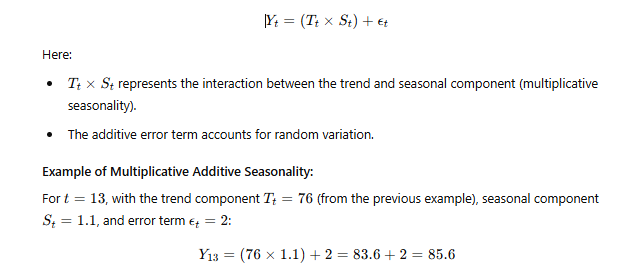

#### <font color='magenta'> </font>

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

## <font color='red'>Model Building for all this models at a time </font>

#### <font color='magenta'>1.Importing necessary libraries</font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

#### <font color='magenta'>2.Generating a random time series dataset </font> 

In [2]:
np.random.seed(42)

In [3]:
# Time index (daily data for 2 years)

time_index = pd.date_range(start='2022-01-01', periods=730, freq='D')

In [4]:
# Simulating a trend (quadratic trend + seasonal effect)

trend = 0.05 * (time_index.dayofyear) ** 2

seasonality = 10 * np.sin(2 * np.pi * time_index.dayofyear / 365)  # Yearly seasonality


In [5]:
# Adding noise

noise = np.random.normal(0, 5, size=len(time_index))

In [6]:
# Creating the actual time series data

data = trend + seasonality + noise

In [7]:
# Creating a DataFrame

df = pd.DataFrame({'Date': time_index, 'Value': data})

df.set_index('Date', inplace=True)

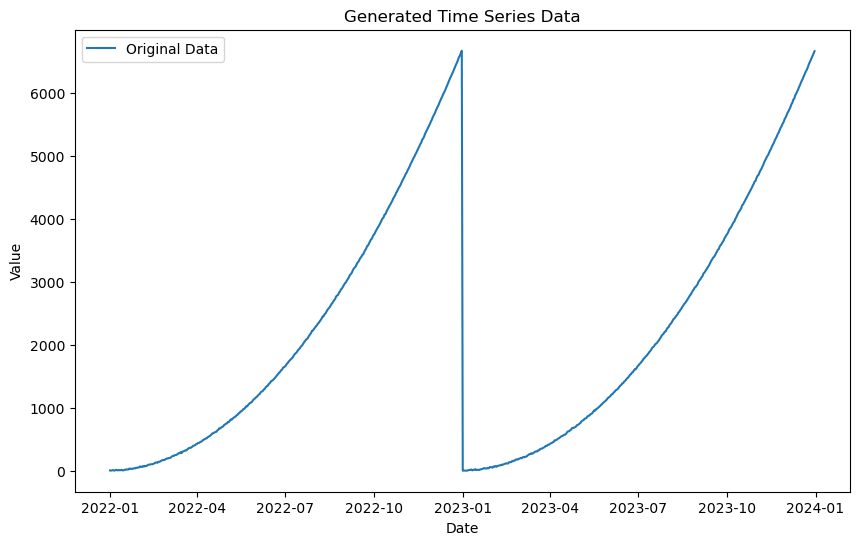

In [8]:
# Plotting the generated data

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### <font color='magenta'> </font> 

#### <font color='magenta'>3.EDA </font> 

In [9]:
# Perform EDA - Decomposition of the series using seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x800 with 0 Axes>

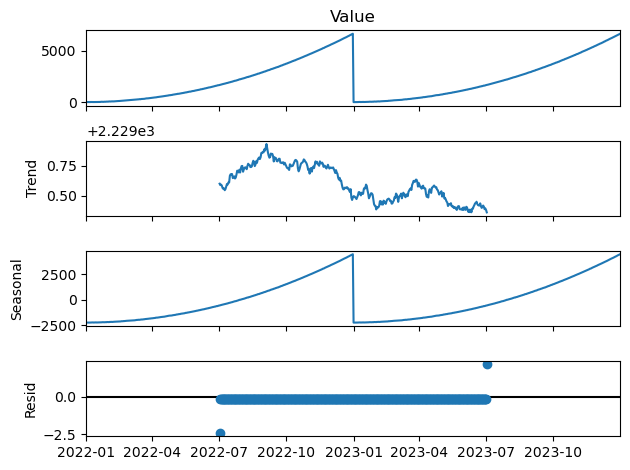

In [10]:
decomposition = seasonal_decompose(df['Value'], model='additive', period=365)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

#### <font color='magenta'> </font> 

#### <font color='magenta'>4.Building different models </font> 

#### <font color='purple'>Linear Model (Simple Linear Regression) </font> 

In [11]:
from sklearn.linear_model import LinearRegression

# Creating time variable for the linear model
df['Time'] = np.arange(len(df))

# Linear regression model
X = df['Time'].values.reshape(-1, 1)
y = df['Value']

linear_model = LinearRegression()
linear_model.fit(X, y)

df['Linear_Prediction'] = linear_model.predict(X)

#### <font color='purple'>Exponential Model (Exponential Smoothing)  </font> 

In [12]:
exp_model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=365)
exp_model_fit = exp_model.fit()

df['Exp_Prediction'] = exp_model_fit.fittedvalues

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


#### <font color='magenta'> </font> 

#### <font color='purple'>Quadratic Model (Polynomial Regression)   </font> 

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

quadratic_model = LinearRegression()
quadratic_model.fit(X_poly, y)

df['Quadratic_Prediction'] = quadratic_model.predict(X_poly)

#### <font color='purple'>   </font> 

#### <font color='purple'>Additive Seasonality (Seasonal decomposition)   </font> 

In [14]:
# Seasonal component is already extracted in decomposition

df['Additive_Seasonality'] = decomposition.seasonal + decomposition.trend

#### <font color='purple'>  </font> 

#### <font color='purple'>Additive Seasonality with Quadratic Trend  </font> 

In [15]:
df['Additive_Seasonality_Quad_Trend'] = decomposition.seasonal + decomposition.trend + trend

#### <font color='magenta'> </font> 

#### <font color='purple'>Multiplicative Seasonality   </font>

In [16]:
df['Multiplicative_Seasonality'] = decomposition.seasonal * decomposition.trend

#### <font color='magenta'> </font> 

#### <font color='purple'>Multiplicative Additive Seasonality  </font> 

In [17]:
df['Multiplicative_Additive_Seasonality'] = (decomposition.seasonal * decomposition.trend) + decomposition.trend

#### <font color='magenta'> </font> 

#### <font color='magenta'>5. Evaluating Models with RMSE </font> 

In [20]:
def rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [23]:
# Check for any NaN values before RMSE calculation
print("Checking for NaN values in the DataFrame:")
print(df.isna().sum())

Checking for NaN values in the DataFrame:
Value                                    0
Time                                     0
Linear_Prediction                        0
Exp_Prediction                           0
Quadratic_Prediction                     0
Additive_Seasonality                   182
Additive_Seasonality_Quad_Trend        182
Multiplicative_Seasonality             182
Multiplicative_Additive_Seasonality    182
dtype: int64


#### <font color='magenta'> </font> 

In [31]:
# 1. Handle boundary NaNs by forward fill or backward fill

df['Additive_Seasonality'] = df['Additive_Seasonality'].fillna(method='ffill').fillna(method='bfill')
df['Additive_Seasonality_Quad_Trend'] = df['Additive_Seasonality_Quad_Trend'].fillna(method='ffill').fillna(method='bfill')
df['Multiplicative_Seasonality'] = df['Multiplicative_Seasonality'].fillna(method='ffill').fillna(method='bfill')
df['Multiplicative_Additive_Seasonality'] = df['Multiplicative_Additive_Seasonality'].fillna(method='ffill').fillna(method='bfill')

In [32]:
# 2. Apply interpolation to fill remaining NaNs (if any)


df['Additive_Seasonality'] = df['Additive_Seasonality'].interpolate(method='linear')
df['Additive_Seasonality_Quad_Trend'] = df['Additive_Seasonality_Quad_Trend'].interpolate(method='linear')
df['Multiplicative_Seasonality'] = df['Multiplicative_Seasonality'].interpolate(method='linear')
df['Multiplicative_Additive_Seasonality'] = df['Multiplicative_Additive_Seasonality'].interpolate(method='linear')

In [33]:
# 3. Check for any remaining NaNs in the DataFrame

print("Checking for NaN values in the DataFrame after boundary fill and interpolation:")
print(df.isna().sum())

Checking for NaN values in the DataFrame after boundary fill and interpolation:
Value                                  0
Time                                   0
Linear_Prediction                      0
Exp_Prediction                         0
Quadratic_Prediction                   0
Additive_Seasonality                   0
Additive_Seasonality_Quad_Trend        0
Multiplicative_Seasonality             0
Multiplicative_Additive_Seasonality    0
dtype: int64


In [34]:
# 4. Now, calculate RMSE for each model

rmse_values = {
    'Linear Model': rmse(df['Value'], df['Linear_Prediction']),
    'Exponential Model': rmse(df['Value'], df['Exp_Prediction']),
    'Quadratic Model': rmse(df['Value'], df['Quadratic_Prediction']),
    'Additive Seasonality': rmse(df['Value'], df['Additive_Seasonality']),
    'Additive Seasonality with Quadratic Trend': rmse(df['Value'], df['Additive_Seasonality_Quad_Trend']),
    'Multiplicative Seasonality': rmse(df['Value'], df['Multiplicative_Seasonality']),
    'Multiplicative Additive Seasonality': rmse(df['Value'], df['Multiplicative_Additive_Seasonality'])
}

In [35]:
# 5. Display RMSE values

print("RMSE values for each model:")
for model, error in rmse_values.items():
    print(f"{model}: {error}")

RMSE values for each model:
Linear Model: 1737.6884129053883
Exponential Model: 3.5676555285268465
Quadratic Model: 1733.2640326975347
Additive Seasonality: 1458.6330129899638
Additive Seasonality with Quadratic Trend: 2657.5896003917705
Multiplicative Seasonality: 3251227.221775577
Multiplicative Additive Seasonality: 3250799.865156293


- the Exponential Model seems to be the best choice for forecasting this dataset, and should be preferred over the others, especially the Multiplicative models due to their very poor performance.

#### <font color='magenta'>6.Prediction </font>

In [37]:
a = 100  # (This should be the 'intercept' or base value of your exponential model)
b = 0.02  # (This should be the 'rate' or growth rate coefficient of your exponential model)

# Assume you want to predict for the next 12 time periods (for example)
forecast_steps = 12

# Generate future time periods (next 12 periods)
future_times = np.arange(len(df), len(df) + forecast_steps)

# Predict future values using the Exponential model
future_predictions = a * np.exp(b * future_times)

# Create a DataFrame for future predictions
future_dates = pd.date_range(df['Time'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]  # Adjust frequency as needed
future_df = pd.DataFrame({'Time': future_dates, 'Predicted_Value': future_predictions})

# Display the future predictions
print(future_df)

                            Time  Predicted_Value
0  1970-02-28 00:00:00.000000729     2.191288e+08
1  1970-03-31 00:00:00.000000729     2.235555e+08
2  1970-04-30 00:00:00.000000729     2.280716e+08
3  1970-05-31 00:00:00.000000729     2.326790e+08
4  1970-06-30 00:00:00.000000729     2.373794e+08
5  1970-07-31 00:00:00.000000729     2.421748e+08
6  1970-08-31 00:00:00.000000729     2.470670e+08
7  1970-09-30 00:00:00.000000729     2.520581e+08
8  1970-10-31 00:00:00.000000729     2.571500e+08
9  1970-11-30 00:00:00.000000729     2.623448e+08
10 1970-12-31 00:00:00.000000729     2.676445e+08
11 1971-01-31 00:00:00.000000729     2.730513e+08


- Based on the predictions from the Exponential Model, the forecast for future values (from February 1970 to January 1971) shows a consistent exponential growth in the predicted values. 

# <font color='red'>END.</font>